In [3]:
import numpy as np
import pandas as pd

In [7]:
#add file for neutral network
df = pd.read_csv('../data/df_dummy_samp.csv')
df.head()

,site_id,building_id,square_feet,timestamp,meter_reading,meter_reading_roll_avg,outlier_ratio,air_temperature,dew_temperature,sea_level_pressure,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,7,121074,2016-02-29 09:00:00,1857.260,2219.768059,0.836691,12.8,8.9,1021.9,...,0,0,0,0,0,0,0,0,0,0
1,0,31,61904,2016-02-29 09:00:00,1097.470,1719.038059,0.638421,12.8,8.9,1021.9,...,0,0,0,0,0,0,0,0,0,0
2,0,55,16726,2016-02-29 09:00:00,337.683,510.662608,0.661264,12.8,8.9,1021.9,...,0,0,0,0,0,0,0,0,0,0
3,0,96,200933,2016-02-29 09:00:00,1266.310,2245.425882,0.563951,12.8,8.9,1021.9,...,0,0,0,0,0,0,0,0,0,0
4,0,103,21657,2016-02-29 09:00:00,337.683,349.270047,0.966825,12.8,8.9,1021.9,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#alredy hote encoded

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4244884 entries, 0 to 4244883
Data columns (total 69 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   site_id                                    int64  
 1   building_id                                int64  
 2   square_feet                                int64  
 3   timestamp                                  object 
 4   meter_reading                              float64
 5   meter_reading_roll_avg                     float64
 6   outlier_ratio                              float64
 7   air_temperature                            float64
 8   dew_temperature                            float64
 9   sea_level_pressure                         float64
 10  wind_speed                                 float64
 11  HDD                                        float64
 12  CDD                                        float64
 13  meter_electricity                         

# TRAIN TEST SPLIT

In [11]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.drop(['meter_reading','timestamp','site_id','building_id'],axis=1).values
X

array([[1.21074000e+05, 2.21976806e+03, 8.36691019e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.19040000e+04, 1.71903806e+03, 6.38421002e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.67260000e+04, 5.10662608e+02, 6.61264394e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.71040000e+04, 1.76912317e+01, 1.04295734e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [9.36080000e+04, 2.45025248e+00, 1.01699724e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [6.59990000e+04, 2.81517327e+00, 7.97286627e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [21]:
y = df['meter_reading'].values
y

array([1857.26  , 1097.47  ,  337.683 , ...,   18.4512,    2.4919,
          2.2445])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Normalizing Data

https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()

In [55]:
X_train = scaler.fit_transform(X_train)

In [56]:
X_test = scaler.fit_transform(X_test)

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm

In [58]:
model = Sequential()

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [59]:
model.fit(x=X_train, y=y_train, epochs=25,batch_size=256, validation_data=(X_test,y_test),)

Train on 2844072 samples, validate on 1400812 samples
Epoch 1/25
2844072/2844072 [==============================] - 71s 25us/sample - loss: 135817.4060 - val_loss: 27448.0348
Epoch 2/25
2844072/2844072 [==============================] - 72s 25us/sample - loss: 93795.8979 - val_loss: 21250.7925
Epoch 3/25
2844072/2844072 [==============================] - 71s 25us/sample - loss: 84897.7416 - val_loss: 17247.1517
Epoch 4/25
2844072/2844072 [==============================] - 73s 26us/sample - loss: 83112.5611 - val_loss: 19897.7906
Epoch 5/25
2844072/2844072 [==============================] - 72s 25us/sample - loss: 80337.0400 - val_loss: 13191.8808
Epoch 6/25
2844072/2844072 [==============================] - 74s 26us/sample - loss: 79393.8190 - val_loss: 10340.3458
Epoch 7/25
2844072/2844072 [==============================] - 74s 26us/sample - loss: 79163.2965 - val_loss: 18405.4868
Epoch 8/25
2844072/2844072 [==============================] - 74s 26us/sample - loss: 77553.0626 - val_lo

In [60]:
loss = pd.DataFrame(model.history.history)









































loss

,loss,val_loss
0,135817.405977,27448.034801
1,93795.897918,21250.792452
2,84897.741620,17247.151692
3,83112.561119,19897.790617
4,80337.040033,13191.880773
5,79393.818986,10340.345843
6,79163.296484,18405.486838
7,77553.062566,12850.916929
8,77484.960358,15690.318217
9,78022.206192,14962.209105


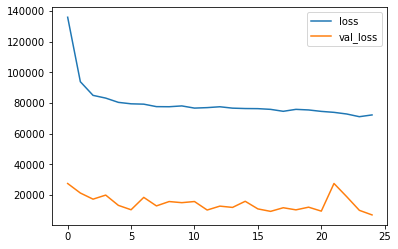

In [61]:
loss[['loss','val_loss']].plot()

In [62]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [63]:
y_pred=model.predict(X_test)
#need to change into dataframe
y_pred = pd.DataFrame(data=y_pred)
y_pred

,0
0,338.752625
1,214.446442
2,79.267677
3,82.244125
4,108.417953
...,...
1400807,65.278503
1400808,110.870895
1400809,498.100159
1400810,73.585297


In [64]:
predictions = [round(value) for value in y_pred]
predictions

[0]

In [65]:
explained_variance_score(y_test,y_pred)

0.992641958112322

In [66]:
mean_absolute_error(y_test,y_pred)

48.698120487822074

In [67]:
r2_score(y_test,y_pred)

0.992483508021654

In [68]:
mean_squared_error(y_test,y_pred,squared=False)

83.51830614217477

In [69]:
results = pd.DataFrame(data = {'actual':y_test,'predictions':y_pred})

TypeError: 'int' object is not iterable